notebook generates rebinned spectra and physical quantities, given specified integration time 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import optimize
from scipy.optimize import curve_fit

from create_arrays import create_arr

In [3]:
# import arrays
# tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_n400.sav',verbose=False,python_dict=False)
# frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_n400_si_iv_nei.sav',verbose=False,python_dict=False)

# tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_dt02.sav',verbose=False,python_dict=False)
# frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_dt02_si_iv_nei.sav',verbose=False,python_dict=False)

tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_si_iv_nei.sav',verbose=False,python_dict=False)

log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [4]:
t_n = tube.tarr.shape[0] - 1 # len of tube in time (in steps of 0.1s)
line = 1403.
ll = np.arange(line-10,line+10,0.01)

In [6]:
SPEC = np.zeros((t_n,2000))
ERROR = np.zeros((t_n,2000))

# note: shape is from the interpolation in create array (see set i_min/i_max). simply change shape to correct value if 
    # error is thrown
shape = 7480
X = np.zeros((t_n,shape)) 
V = np.zeros((t_n,shape))
T = np.zeros((t_n,shape))
EMISS = np.zeros((t_n,shape))
G = np.zeros((t_n,shape))
FAC = np.zeros((t_n,shape))

for i in range(0,t_n):

    arrs = create_arr(tube,frac,log10T,log10G,time=i)
    
    SPEC[i,:] = arrs['spec']
    ERROR[i,:] = arrs['error']
    X[i,:] = arrs['x']
    V[i,:] = arrs['v']
    T[i,:] = arrs['T']   
    EMISS[i,:] = arrs['EM']
    G[i,:] = arrs['g']
    FAC[i,:] = arrs['fac']
    

/Users/WilliamHenryAshfieldIV/synth_spec/create_arrays.py:114: RuntimeWarning: divide by zero encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/synth_spec/create_arrays.py:160: RuntimeWarning: overflow encountered in double_scalars
  emissNEI[i,:] = photo_fac*EM[i]*factor[i]*10**g[i]/np.sqrt(2*np.pi)/sig[i]*np.exp(-(ll-line-line*v[i]/c)**2/(2*sig[i]**2))
/Users/WilliamHenryAshfieldIV/synth_spec/create_arrays.py:160: RuntimeWarning: invalid value encountered in double_scalars
  emissNEI[i,:] = photo_fac*EM[i]*factor[i]*10**g[i]/np.sqrt(2*np.pi)/sig[i]*np.exp(-(ll-line-line*v[i]/c)**2/(2*sig[i]**2))


In [33]:
ERROR.shape

(500, 2000)

Text(0.5, 0, 'wavelength [$\\AA$]')

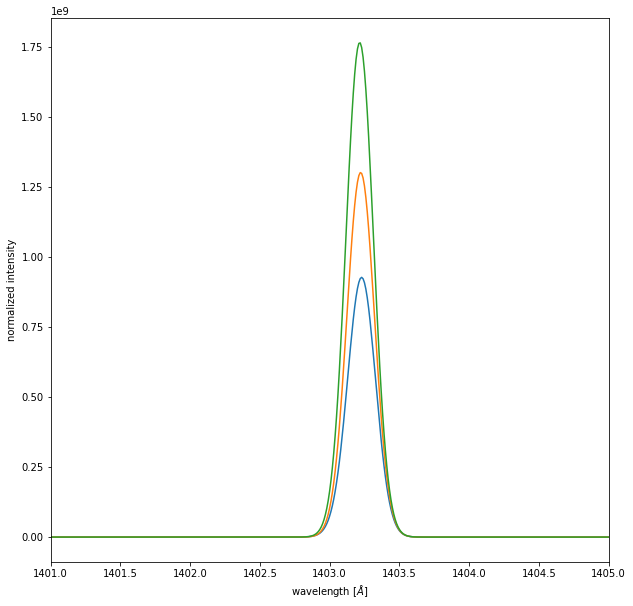

In [49]:
fig, ax = plt.subplots(figsize=[10,10])
plt.plot(ll,SPEC[290,:])
plt.plot(ll,SPEC[300,:])
plt.plot(ll,SPEC[310,:])
plt.xlim(1401,1405)
plt.ylabel('normalized intensity')
ax.set_xlabel('wavelength [$\AA$]')

In [35]:
dt = 0.1
inegration = 2
reshape = int(inegration/dt)
reshape

20

In [41]:
SPECII = ERROR.reshape(reshape,-1,2000)
SPECII.shape

ERRORII = ERROR.reshape(reshape,-1,2000)
ERRORII.shape

(20, 25, 2000)

In [44]:
spec = np.mean(SPECII,axis=0)
error = np.mean(ERRORII,axis=0)

In [45]:
error.shape

(25, 2000)

Text(0.5, 0, 'wavelength [$\\AA$]')

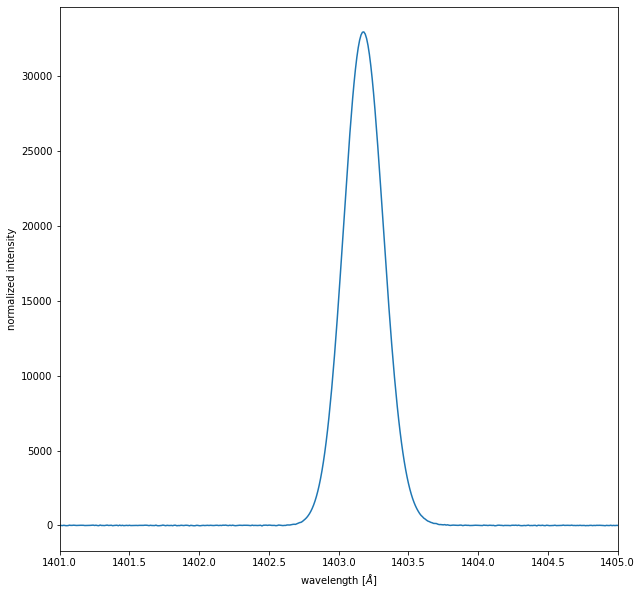

In [46]:
fig, ax = plt.subplots(figsize=[10,10])
plt.plot(ll,spec[15,:])
plt.xlim(1401,1405)
plt.ylabel('normalized intensity')
ax.set_xlabel('wavelength [$\AA$]')

Save new specturm array to txt file:

In [18]:
np.savetxt('avg_spec.txt', spec, fmt='%d')
np.savetxt('avg_error.txt', error, fmt='%d')

Now, we can animate our rebinned spectrum:

In [26]:
from matplotlib import animation, rc
from IPython.display import HTML

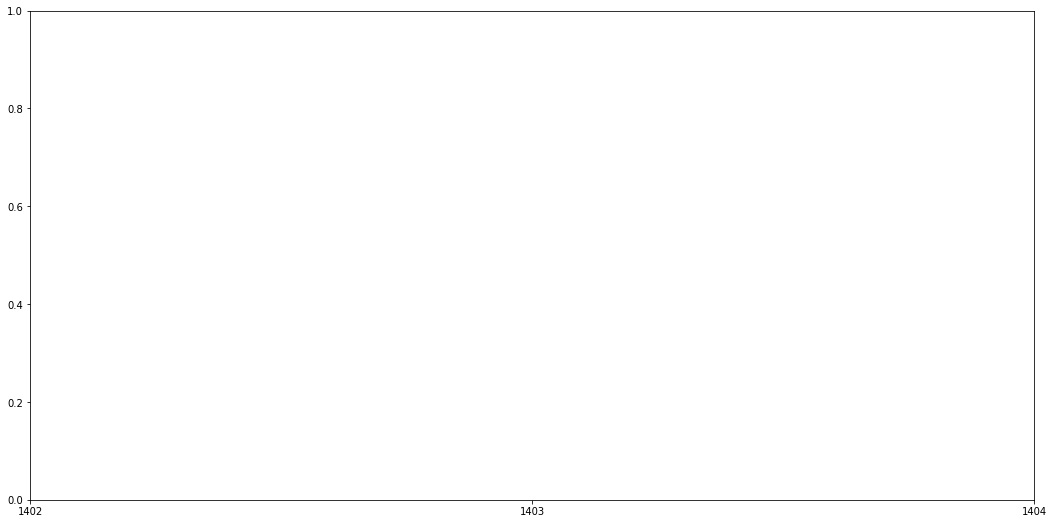

In [27]:
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlim(1402,1404)
ax.set_xticks(np.arange(1402, 1405, 1))

In [28]:
# data placeholders
wav,specs = np.zeros(0),np.zeros(0)#,np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0)

# plot placeholder/object
plot_spec, = ax.plot(wav,specs)

In [29]:
def update(i):

    global wav
    global specs
    
    wav = ll
    specs = spec[i,:]
    
    plot_spec.set_data(wav,specs)
   
    plot_spec.axes.set_ylim(0,np.max(specs)+0.05*np.max(specs))
    time = np.around(i*2, decimals=1)
    plot_spec.axes.set_ylim(0,np.max(specs)+0.05*np.max(specs))
    plot_spec.axes.set_title('time = '+str(time)+'s')
    plot_spec.axes.ticklabel_format(style='sci',axis='y',useMathText=False,scilimits=(0,2))
    
    return plot_spec

In [30]:
simulation = animation.FuncAnimation(fig, update, blit=False, frames=25, interval=20, repeat=False)

In [31]:
HTML(simulation.to_html5_video())

In [32]:
simulation.save(filename='sml.mp4',fps=2,dpi=300)